In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [2]:
%matplotlib inline
# %matplotlib qt

In [3]:
# from here https://stackoverflow.com/a/16445006/4999991
def polarToRectangular(radii, angles):
    return radii * np.exp(1j * angles)

In [4]:
def sortZip(x, y):
    order = np.argsort(x)
    xs = np.array(x)[order]
    ys = np.array(y)[order]
    return xs, ys

In [5]:
def plotSort(x, y):
    xs, ys = sortZip(x, y)
    plt.plot(xs, ys)

In [6]:
def frequencyGenerator(time, steps=None):
    𝛿 = time.max() - time.min()
    if steps is None:
        steps = np.diff(time).min()
    M = np.arange(1, steps + 1)
    return M / 𝛿, steps

In [7]:
def easyFourierTransform(time, signal, frequency=None, steps=None, sorted=False, uniform=False):
    if sorted:
        ts = time
        Xs = signal
    else:
        ts, Xs = sortZip(time, signal)
    
    if frequency is None:
        frequency, steps = frequencyGenerator(ts, steps)
    else:
        steps = frequency.shape[0]
    
    if uniform:
        N = signal.shape[0]
        amplitude = np.abs(scipy.fftpack.fft(signal)[:steps]) * 2.0 / N
    else:
        ft = frequency[:, np.newaxis]
        𝜃 = (ts - ts.min()) * 2 * np.pi * ft
        Y = polarToRectangular(Xs, 𝜃)[:, 1:] * np.diff(ts)
        amplitude = np.abs(Y.sum(axis=1))
    return frequency, amplitude

In [36]:
def easyFourierTransformThreshold(time, signal, frequency=None, steps=None, sorted=False, uniform=False):
    
    threshold = 0.5
    if sorted:
        ts = time
        Xs = signal
    else:
        ts, Xs = sortZip(time, signal)
    
    if frequency is None:
        frequency, steps = frequencyGenerator(ts, steps)
    else:
        steps = frequency.shape[0]
    
    if uniform:
        N = signal.shape[0]
        amplitude = np.abs(scipy.fftpack.fft(signal)[:steps]) * 2.0 / N
    else:
        ft = frequency[:, np.newaxis]
        𝜃 = (ts - ts.min()) * 2 * np.pi * ft
        Y = polarToRectangular(Xs, 𝜃)[:, 1:] * np.diff(ts)
        amplitude = np.abs(Y.sum(axis=1))
        threshold = amplitude[np.argsort(amplitude)[-5:]].mean()
        for i in range(len(amplitude)):
            if amplitude[i] < threshold:
                amplitude[i] = 0
    return frequency, amplitude

Example 1:

In [42]:
X1

array([ 3.26663735e-01,  1.39959358e+00, -1.44614528e+00, -1.11044873e+00,
       -8.62716872e-01, -6.76807842e-01,  2.89228813e-01, -4.39107285e-01,
       -5.97523030e-01, -1.36795595e+00, -5.85451916e-01, -2.01752229e+00,
       -8.49562270e-01,  8.07413150e-01,  4.34684526e-01, -6.75681131e-01,
       -3.50884021e-01, -1.17339422e-01, -8.94072056e-03, -8.93533765e-01,
       -7.59018272e-01,  9.36011171e-01,  4.88844064e-01,  1.22373693e+00,
       -6.58389372e-01, -1.00842815e+00,  1.46539173e+00, -1.32580105e+00,
        1.08815734e+00, -3.17840028e-01, -1.64153284e-01,  4.14424976e-01,
       -9.29486897e-02,  7.64161545e-01, -4.49847199e-01, -1.17137727e+00,
       -9.09856936e-01,  4.31382135e-01, -6.26273364e-01,  6.25416444e-01,
       -1.65378812e-01,  1.97594362e+00,  1.08353505e+00,  1.53608511e-01,
       -9.74170892e-01,  2.52663427e-01,  1.73515863e-01,  3.79530042e-01,
       -8.48540817e-01, -1.90144943e+00, -4.48338002e-01, -2.94950946e-01,
        6.15586155e-01, -

In [38]:
N1 = 1000  # number of samples
# assuming the time start is 0.0 and time end is 1.0
t1 = np.random.uniform(0.0, 5.0, N1)
X1 = 1.0 * np.sin(5.0 * 2 * np.pi * t1) + 0.5 * np.sin(8.0 * 2 * np.pi * t1) + 0.6 * np.sin(30 * 2 * np.pi * t1) + 0.1 * np.random.randn(N1) 

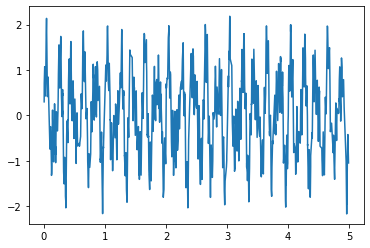

In [39]:
plotSort(t1, X1)

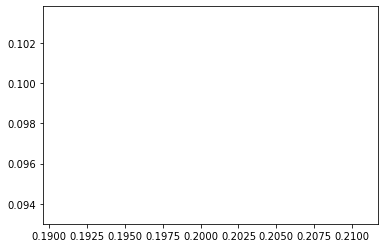

In [40]:
f1, a1 = easyFourierTransform(t1, X1)
plt.plot(f1, a1)

1


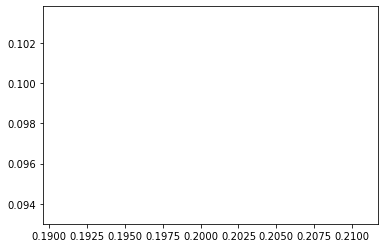

In [41]:
f1, a1 = easyFourierTransformThreshold(t1, X1)
plt.plot(f1, a1)

Audio length: 5.01 seconds


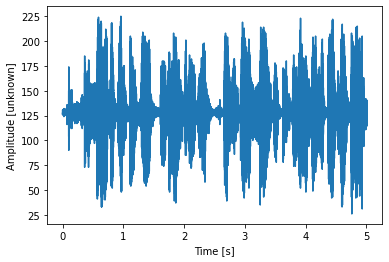

In [33]:
from scipy.io import wavfile

rate, audio = wavfile.read('Example2.wav')

#audio = np.mean(audio, axis=1)

N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

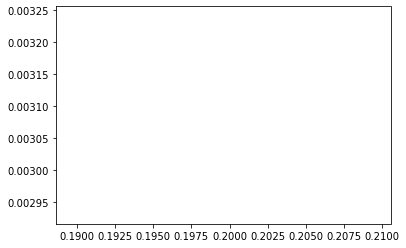

In [34]:
f_audio, a_audio = easyFourierTransformThreshold(np.arange(N) / rate, audio)
plt.plot(f_audio, a_audio)

In [44]:
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (110484,), Sliced audio shape: (1095, 1024)


In [45]:
win = np.hanning(M + 1)[:-1]
slices = slices * win
slices = slices.T
print('Shape of `slices`:', slices.shape)
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

Shape of `slices`: (1024, 1095)


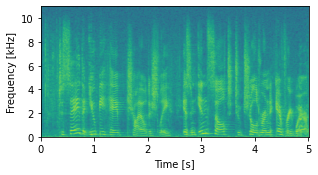

In [46]:
f, ax = plt.subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

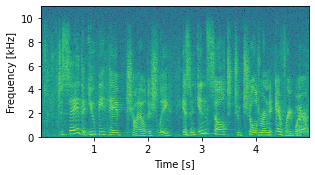

In [47]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

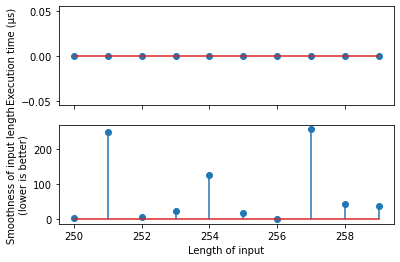

In [48]:
import time

from scipy import fftpack
from sympy import factorint

K = 1000
lengths = range(250, 260)

# Calculate the smoothness for all input lengths
smoothness = [max(factorint(i).keys()) for i in lengths]


exec_times = []
for i in lengths:
    z = np.random.random(i)

    # For each input length i, execute the FFT K times
    # and store the execution time

    times = []
    for k in range(K):
        tic = time.monotonic()
        fftpack.fft(z)
        toc = time.monotonic()
        times.append(toc - tic)

    # For each input length, remember the *minimum* execution time
    exec_times.append(min(times))


f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)
ax0.stem(lengths, np.array(exec_times) * 10**6, use_line_collection = True)
ax0.set_ylabel('Execution time (µs)')

ax1.stem(lengths, smoothness, use_line_collection = True)
ax1.set_ylabel('Smoothness of input length\n(lower is better)')
ax1.set_xlabel('Length of input');